In [1]:
#!conda install --yes cartopy

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cart
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

In [3]:
df=pd.read_excel("C:/Users/Zaineb/Desktop/METEO/PFE/dataset_ONPC.xlsx")
df

,STATION,DATE,ESPACE BRULEE EN HECTARES
0,Manouba,2020-07-02,20
1,Kairouan,2020-07-02,3
2,Ain Drahem,2020-07-02,9
3,Siliana,2020-07-02,3
4,Kef,2020-07-02,7
5,Ghar Dimaou,2020-07-23,70
6,Siliana,2020-07-28,100
7,Bizerte,2020-07-29,15
8,Amdoun,2020-08-03,820
9,Kef,2020-08-04,400


In [72]:
dfL=pd.read_excel("C:/Users/Zaineb/Desktop/METEO/PFE/Lon-Lat.xlsx")
dfL

,STATION,Latitude,Longitude
0,la_marsa,36.8907,10.3181
1,tunis_ville,36.8102,10.1853
2,sidi_hsine,36.7525,10.1115
3,ariana_ville,36.8688,10.1716
4,kalat_andalous,37.0564,10.1159
...,...,...,...
103,tataouine,32.9388,10.4493
104,thhiba,32.0135,10.6944
105,remada,32.3208,10.3970
106,el_borma,31.6876,9.2217


In [73]:
fn=dfL.merge(df, how= 'inner', on='STATION')
fn

,STATION,Latitude,Longitude,ICL,IH,IS,IPI,ICD,IFM,CONCLUSION
0,la_marsa,36.8907,10.3181,88.040042,176.404310,8.798,8.430555,172.369117,31.153041,DANGER FAIBLE
1,tunis_ville,36.8102,10.1853,95.472579,229.678378,9.734,21.749090,223.824083,84.853512,DANGER SEVERE
2,sidi_hsine,36.7525,10.1115,96.013896,195.719091,9.752,20.123574,191.074934,76.396781,DANGER SEVERE
3,ariana_ville,36.8688,10.1716,94.417954,157.433732,9.500,19.794499,153.981755,70.325354,DANGER SEVERE
4,kalat_andalous,37.0564,10.1159,93.698833,225.210242,9.284,20.842354,219.513754,81.107695,DANGER SEVERE
...,...,...,...,...,...,...,...,...,...,...
103,tataouine,32.9388,10.4493,94.725810,258.277516,9.320,14.513194,251.291873,57.283674,DANGER MODERE
104,thhiba,32.0135,10.6944,95.625253,279.504698,9.536,22.205685,271.631239,88.081988,DANGER SEVERE
105,remada,32.3208,10.3970,95.858787,276.891454,9.518,22.921009,269.130142,90.874546,DANGER TRES SEVERE
106,el_borma,31.6876,9.2217,98.257014,317.898179,10.256,30.023794,308.303642,119.662231,DANGER TRES SEVERE


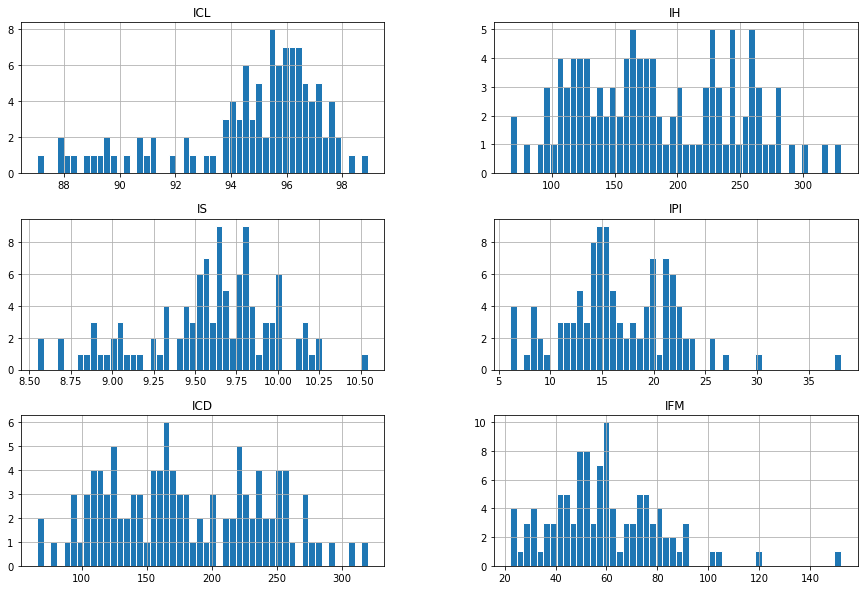

In [74]:
fn.iloc[:,3:].hist(bins=50, figsize=(15,10), ec='w')
plt.show()

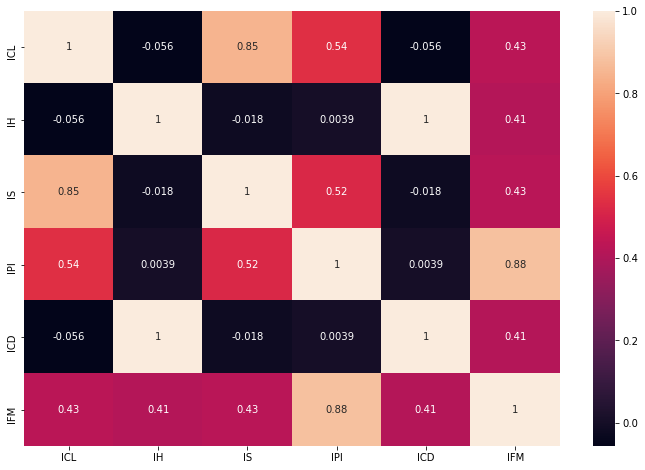

In [75]:
corr_matrix = fn.iloc[:,3:].corr(method='spearman')
ax = plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix, annot=True)

In [76]:
lat= fn['Latitude'].values
lon= fn['Longitude'].values
i=fn['IFM'].values
b=fn['CONCLUSION']

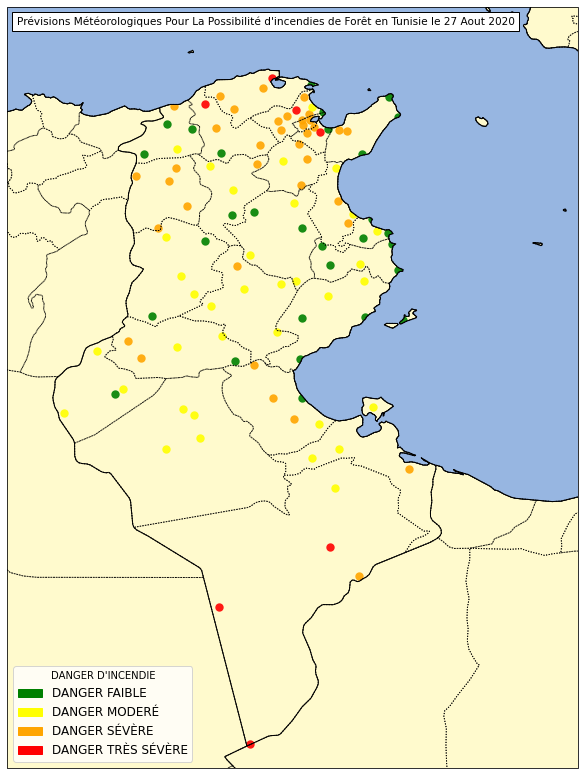

In [81]:
fig = plt.figure(figsize=(16, 14))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([7, 13, 30, 38],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cart.feature.LAND, zorder=0.1, edgecolor='k', facecolor="lemonchiffon")
ax.add_feature(cart.feature.OCEAN, zorder=1, edgecolor='k')
ax.add_feature(cart.feature.LAKES, alpha=0.3)
ax.add_feature(cfeature.STATES, linestyle='dotted')
#ax.stock_img()

for k in range(len(fn)):
    if fn['CONCLUSION'][k] == 'DANGER FAIBLE':
        m= 'green'
    if fn['CONCLUSION'][k] == 'DANGER MODERE':
        m='yellow'
    if fn['CONCLUSION'][k] == 'DANGER SEVERE':
        m= 'orange'
    if fn['CONCLUSION'][k] == 'DANGER TRES SEVERE': 
        m= 'red'
    plt.scatter(x=fn['Longitude'][k], y=fn['Latitude'][k], c=m, linewidth=0, alpha=0.9, s=70)
green_patch = mpatches.Patch(color='green', label='DANGER FAIBLE')
yellow_patch = mpatches.Patch(color='yellow', label='DANGER MODERÉ')
orange_patch = mpatches.Patch(color='orange', label='DANGER SÉVÈRE')
red_patch = mpatches.Patch(color='red', label='DANGER TRÈS SÉVÈRE')
plt.legend(handles=[green_patch,yellow_patch,orange_patch,red_patch],loc ="lower left",prop={'size': 12}, title = "DANGER D'INCENDIE")
text = AnchoredText("Prévisions Météorologiques Pour La Possibilité d'incendies de Forêt en Tunisie le 27 Aout 2020", loc=2, prop={'size': 10.5}, frameon=True)
ax.add_artist(text)
"""for j in range(len(fn)):
    ax.text(lon[j], lat[j], fn['STATION'][j],fontsize = 8)"""
plt.show()
fig.savefig('CARTE IFM DU 27 Aout 2020.png')